In [3]:
import getFamaFrenchFactors as gff

In [2]:
pip install getFamaFrenchFactors


  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=7a72c1c5ecad897184e63ef832d69db3b28e5d880998d6afad3459f2b8d5d026
  Stored in directory: c:\users\kshit\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [1]:

import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro,boxcox,yeojohnson
from scipy.stats import boxcox
import matplotlib.pyplot as plt
#define stock properties
ticker = 'nvr'
start = '2017-1-1'
end = '2021-12-31'
#Get stock data as per requirements
stock_data = yf.download(ticker, start, end, adjusted=True)
#Get monthly frequency 
ff3_monthly = gff.famaFrench3Factor(frequency='m')
#Define date format
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)
#Define stock return format
stock_returns = stock_data['Adj Close'].resample('M').last().pct_change().dropna()
stock_returns.name = "Month_Rtn"
ff_data = ff3_monthly.merge(stock_returns,on='Date')

X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Month_Rtn'] - ff_data['RF']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

rf = ff_data['RF'].mean()
market_premium = ff3_monthly['Mkt-RF'].mean()
size_premium = ff3_monthly['SMB'].mean()
value_premium = ff3_monthly['HML'].mean()

expected_monthly_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
print("Expected yearly return: " + str(expected_yearly_return))
print("Expected monthly return: " + str(expected_monthly_return))



[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     9.149
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           5.23e-05
Time:                        21:14:45   Log-Likelihood:                 78.517
No. Observations:                  59   AIC:                            -149.0
Df Residuals:                      55   BIC:                            -140.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

NameError: name 'LinearRegression' is not defined

In [3]:
#CAPM Model
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff

ticker = "NVR"
stock_data = yf.download(ticker, start="2017-01-01", end="2021-12-31")
factors = pd.read_csv("./data/fffactors_w.csv", index_col="Date")

# convert Date index to datetime object
factors.index= pd.to_datetime(factors.index, format="%Y%m%d")

# get monthly avg
factors = factors.resample('BM').mean()

factors_cum = factors.cumsum()
factors_cum.plot.line()


stock_prices = stock_data['Adj Close']
stock_prices = stock_prices.resample("1M").last()
returns = stock_prices.pct_change()
returns = returns.dropna()
returns.name = "Asset"

ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))
ff3_monthly.dtypes
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)
ff_data = ff3_monthly.merge(returns, on='Date')
rf = ff_data['RF'].mean()
market_premium = ff_data['Mkt-RF'].mean()

X = ff_data['Mkt-RF']
ff_data['Asset-RF'] = ff_data['Asset'] - ff_data['RF']
y = ff_data['Asset-RF']
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
intercept, beta = result.params
print(result.params)
expected_return = rf + beta*market_premium
print("Expected monthly returns: " + str(expected_return))
yearly_return = expected_return * 12
print("Expected yearly returns: " + str(yearly_return))



[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:               Asset-RF   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     25.70
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           4.50e-06
Time:                        10:22:45   Log-Likelihood:                 77.555
No. Observations:                  59   AIC:                            -151.1
Df Residuals:                      57   BIC:                            -147.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [4]:
#Fama French 3
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro,boxcox,yeojohnson
from scipy.stats import boxcox
import matplotlib.pyplot as plt
#define stock properties
ticker = 'nvr'
start = '2017-1-1'
end = '2021-12-31'
#Get stock data as per requirements
stock_data = yf.download(ticker, start, end, adjusted=True)
#Get monthly frequency 
ff3_monthly = gff.famaFrench3Factor(frequency='m')
#Define date format
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)
#Define stock return format
stock_returns = stock_data['Adj Close'].resample('M').last().pct_change().dropna()
stock_returns.name = "Month_Rtn"
ff_data = ff3_monthly.merge(stock_returns,on='Date')

X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Month_Rtn'] - ff_data['RF']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

rf = ff_data['RF'].mean()
market_premium = ff3_monthly['Mkt-RF'].mean()
size_premium = ff3_monthly['SMB'].mean()
value_premium = ff3_monthly['HML'].mean()

expected_monthly_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
print("Expected yearly return: " + str(expected_yearly_return))
print("Expected monthly return: " + str(expected_monthly_return))



[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     9.149
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           5.23e-05
Time:                        21:18:14   Log-Likelihood:                 78.517
No. Observations:                  59   AIC:                            -149.0
Df Residuals:                      55   BIC:                            -140.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [12]:
from datetime import datetime

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import statsmodels.api as sm

etsy = yf.Ticker("NVR")
hist = etsy.history(period="max", auto_adjust=True, rounding=False)
price = hist[["Close"]]
monthly_price = price.resample('BM').last()

# calculate monthly returns
monthly_returns = monthly_price.pct_change().dropna()

# calculate excess monthly returns
excess_returns = (monthly_returns['Close'] - ff_data['RF']).dropna()
excess_returns = pd.DataFrame(data=excess_returns.values, index=excess_returns.index, columns=["Returns"])

excess_returns.head

<bound method NDFrame.head of              Returns
Date                
2017-02-28  0.041026
2017-03-31  0.088544
2017-05-31  0.080456
2017-06-30  0.055583
2017-07-31  0.082196
2017-08-31  0.041396
2017-10-31  0.148442
2017-11-30  0.058209
2018-01-31 -0.095179
2018-02-28 -0.106507
2018-04-30  0.105743
2018-05-31 -0.036710
2018-07-31 -0.072609
2018-08-31 -0.034571
2018-10-31 -0.095704
2018-11-30  0.092424
2018-12-31 -0.007210
2019-01-31  0.089410
2019-02-28 -0.016838
2019-04-30  0.137213
2019-05-31  0.013472
2019-07-31 -0.009647
2019-09-30  0.031084
2019-10-31 -0.023225
2019-12-31  0.002957
2020-01-31  0.000948
2020-03-31 -0.300632
2020-04-30  0.206643
2020-06-30  0.011428
2020-07-31  0.205930
2020-08-31  0.060506
2020-09-30 -0.020545
2020-11-30  0.011053
2020-12-31  0.020585
2021-03-31  0.046678
2021-04-30  0.065204
2021-05-31 -0.026080
2021-06-30  0.017611
2021-08-31 -0.008168
2021-09-30 -0.074491
2021-11-30  0.067529
2021-12-31  0.130711>

<AxesSubplot:xlabel='Date'>

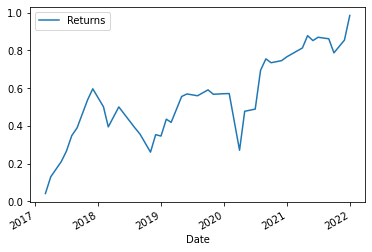

In [13]:
excess_returns_cum = excess_returns.cumsum()
excess_returns_cum.plot.line()

In [17]:
# join factors to returns dfs
data = ff_data.join(excess_returns).dropna()

y = data[["Returns"]] 
x = data[["Mkt-RF","SMB","HML"]]


ols = sm.OLS(y,x)

result1 = ols.fit()
betas = result1.params
print(betas)

Mkt-RF    1.152276
SMB      -0.589695
HML       0.352358
dtype: float64


In [18]:
latest_factors = ff_data.tail(1).to_dict('r')[0]

RRR = latest_factors["RF"]
    + betas["Mkt-RF"] * latest_factors["Mkt-RF"]
    + betas["SMB"] * latest_factors["SMB"]
    + betas["HML"] * latest_factors["HML"]

print(f"Required rate of return is: {RRR}")

IndentationError: unexpected indent (105010658.py, line 4)

In [20]:
latest_factors = ff_data.tail(1).to_dict('r')[0]

RRR = latest_factors["RF"]+ betas["Mkt-RF"] * latest_factors["Mkt-RF"]+ betas["SMB"] * latest_factors["SMB"]+ betas["HML"] * latest_factors["HML"]

print(f"Required rate of return is: {RRR}")

Required rate of return is: 0.0566015814219651


C:\Users\kshit\AppData\Local\Temp\ipykernel_16648\982764587.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  latest_factors = ff_data.tail(1).to_dict('r')[0]


In [21]:
latest_factors = ff_data.tail(1).to_dict('r')[0]

RRR = latest_factors["RF"]+ betas["Mkt-RF"] * latest_factors["Mkt-RF"]+ betas["SMB"] * latest_factors["SMB"]+ betas["HML"] * latest_factors["HML"]

print(f"Required rate of return is: {RRR}")

Required rate of return is: 0.0566015814219651


C:\Users\kshit\AppData\Local\Temp\ipykernel_16648\982764587.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  latest_factors = ff_data.tail(1).to_dict('r')[0]


<AxesSubplot:xlabel='Date'>

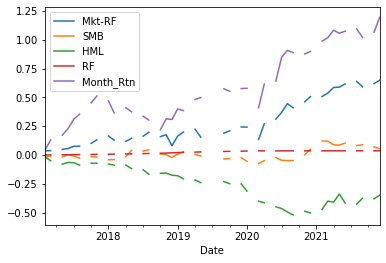

In [23]:
ff_data.index= pd.to_datetime(ff_data.index, format="%Y%m%d")

# get monthly avg
factors = ff_data.resample('BM').mean()

factors_cum = factors.cumsum()
factors_cum.plot.line()

<AxesSubplot:xlabel='Date'>

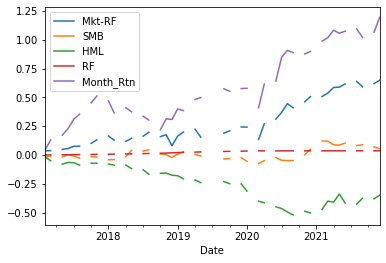

In [24]:
ff_data.index= pd.to_datetime(ff_data.index, format="%Y%m")

# get monthly avg
factors = ff_data.resample('BM').mean()

factors_cum = factors.cumsum()
factors_cum.plot.line()